In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pop_df=pd.read_csv(r'E:\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv',skiprows=4)

In [5]:
pop_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN


**qiuck overiview of the data**

In [6]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

- every year column have 1 to 2 empty column, fill it with median 

In [7]:
year_col=[str(year) for year in range(1960,2025)]
pop_df[year_col]=pop_df[year_col].apply(lambda col: col.fillna(col.median()))

In [8]:
pop_df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                0
                 ... 
2021                0
2022                0
2023                0
2024                0
Unnamed: 69       266
Length: 70, dtype: int64

In [9]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            266 non-null    float64
 5   1961            266 non-null    float64
 6   1962            266 non-null    float64
 7   1963            266 non-null    float64
 8   1964            266 non-null    float64
 9   1965            266 non-null    float64
 10  1966            266 non-null    float64
 11  1967            266 non-null    float64
 12  1968            266 non-null    float64
 13  1969            266 non-null    float64
 14  1970            266 non-null    float64
 15  1971            266 non-null    float64
 16  1972            266 non-null    float64
 17  1973            266 non-null    flo

**The world population growth**

In [10]:
# melting data
pop_long=pd.melt(pop_df,
                 id_vars=('Country Name','Country Code','Indicator Name','Indicator Code'),
                 value_vars=year_col,
                 var_name='Year',
                 value_name='Population')

In [11]:
pop_long.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130075728.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,9035043.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97630925.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5231654.0


In [12]:
pop_growth=pop_long.groupby(['Year'])[['Population']].sum().reset_index()

In [13]:
pop_growth.head()

,Year,Population
0,1960,3.047352e+10
1,1961,3.089734e+10
2,1962,3.146797e+10
3,1963,3.217309e+10
4,1964,3.288453e+10


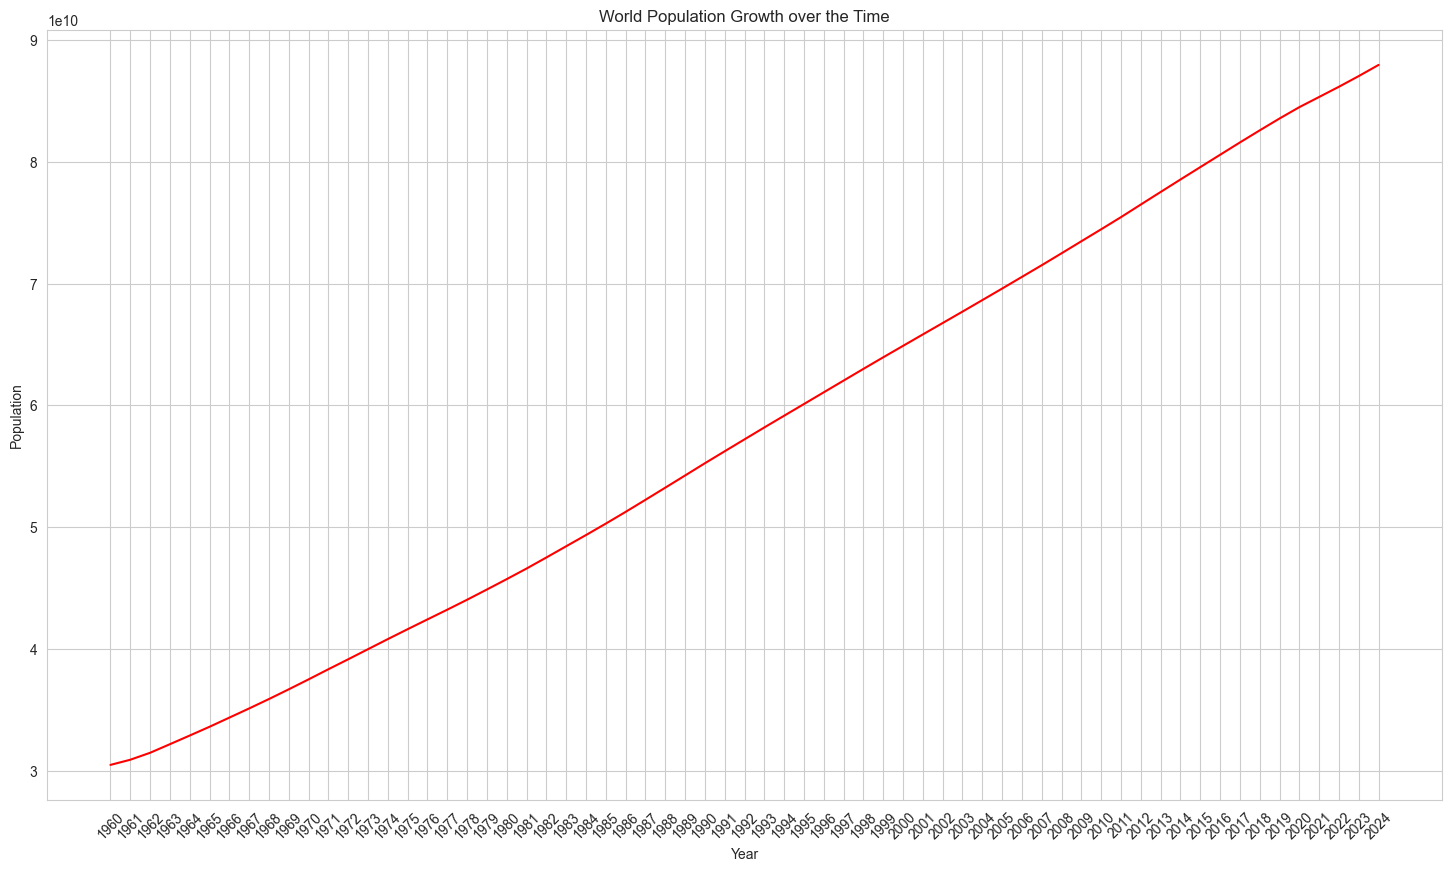

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
sns.lineplot(data=pop_growth,x='Year',y='Population',color='red')
plt.title("World Population Growth over the Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.show()

**Growth Rate by decade**

In [15]:
pop_growth['Decade']=(pop_growth['Year'].astype(int) //10)*10

In [16]:
total=pop_growth['Population'].sum()
pop_growth['growth_pct']=(pop_growth['Population']/total)*100

In [17]:
pop_growth.head()

,Year,Population,Decade,growth_pct
0,1960,3.047352e+10,1960,0.811896
1,1961,3.089734e+10,1960,0.823188
2,1962,3.146797e+10,1960,0.838391
3,1963,3.217309e+10,1960,0.857177
4,1964,3.288453e+10,1960,0.876132


In [18]:
pop_growth['Decade'].unique()

array([1960, 1970, 1980, 1990, 2000, 2010, 2020])

In [19]:
decade_growth=pop_growth.groupby(['Decade'])[['growth_pct']].mean().reset_index()

In [20]:
decade_growth.head(7)

,Decade,growth_pct
0,1960,0.888613
1,1970,1.097523
2,1980,1.329174
3,1990,1.588421
4,2000,1.842205
5,2010,2.105775
6,2020,2.296578


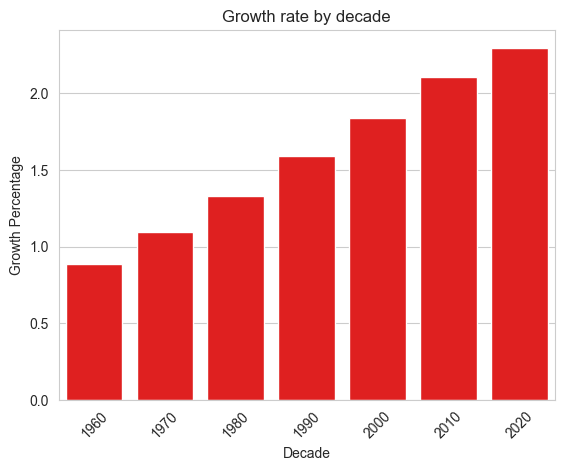

In [21]:
sns.set_style('whitegrid')
sns.barplot(data=decade_growth,x='Decade',y='growth_pct',color='red')
plt.title("Growth rate by decade")
plt.xlabel("Decade")
plt.ylabel('Growth Percentage')
plt.xticks(rotation=45)
plt.show()

**Country Level comparision**

Top ten populus country over the time

In [22]:
pop_long.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130075728.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,9035043.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97630925.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5231654.0


In [23]:
pop_country=pop_long.groupby(['Country Name','Year'])[['Population']].sum().reset_index()

In [24]:
pop_country.head()

,Country Name,Year,Population
0,Afghanistan,1960,9035043.0
1,Afghanistan,1961,9214083.0
2,Afghanistan,1962,9404406.0
3,Afghanistan,1963,9604487.0
4,Afghanistan,1964,9814318.0


In [25]:
top_pop_country=pop_country.groupby(['Year'],group_keys=False).apply(lambda x:x.nlargest(10,'Population'))

C:\Users\abdumiz\AppData\Local\Temp\ipykernel_5740\881950070.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_pop_country=pop_country.groupby(['Year'],group_keys=False).apply(lambda x:x.nlargest(10,'Population'))


In [26]:
top_pop_country.head(11)

,Country Name,Year,Population
17030,World,1960,3.021513e+09
6890,IDA & IBRD total,1960,2.289192e+09
9295,Low & middle income,1960,2.083719e+09
10530,Middle income,1960,1.968969e+09
6825,IBRD only,1960,1.893705e+09
16510,Upper middle income,1960,1.149653e+09
8515,Late-demographic dividend,1960,1.094884e+09
4095,East Asia & Pacific,1960,1.042819e+09
4030,Early-demographic dividend,1960,9.689094e+08
6565,High income,1960,9.082573e+08


In [27]:
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


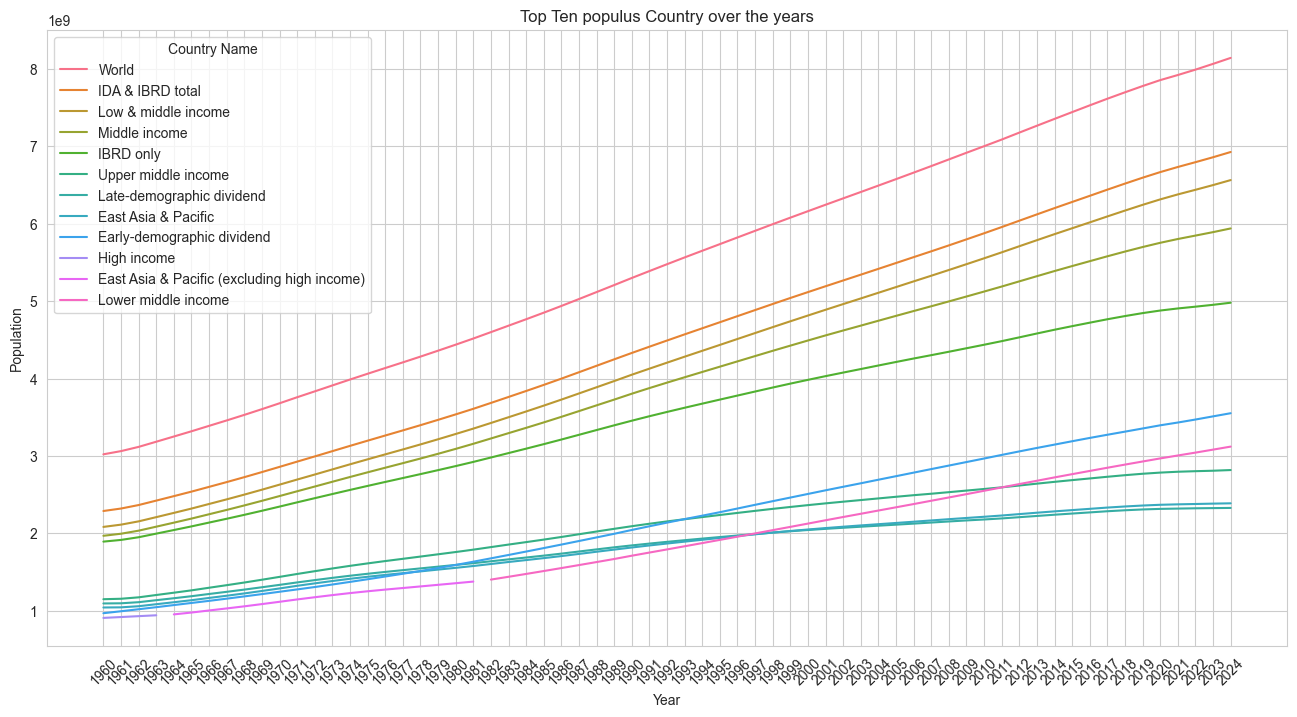

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.lineplot(data=top_pop_country,x='Year',y='Population',hue='Country Name',color='red')
plt.title('Top Ten populus Country over the years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()